## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import pandas as pd

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import ADASYN
import keras_costum_metric.Balanced_accuracy as ba
import keras_costum_metric.F1metric_keras as f1
import keras_custom_callback.Early_Stop_AccLoss as Stop_AL
import keras_custom_callback.Checkpoint_best_auc as Checkpoint_A


import Set_model as model
import plot

## dataset 

In [2]:
# Load the dataset
credit_df=pd.read_csv("..\\data\\new_german_credit.csv")
pd.set_option('display.max_columns', None)
credit_df.head(10)

Unnamed: 0  Creditability  Account Balance  Duration of Credit (month)  \
0           0              1                1                           7   
1           1              1                1                           9   
2           2              1                2                           8   
3           3              1                1                           8   
4           4              1                1                           8   
5           5              1                1                           9   
6           6              1                1                           9   
7           7              1                1                           9   
8           8              1                3                           7   
9           9              1                2                           6   

   Payment Status of Previous Credit  Purpose  Credit Amount  \
0                                  3        2              8   
1                                  3        0              6   
2                                  2        3              9   
3                                  3        0              7   
4                                  3        0              7   
5                                  3        0              7   
6                                  3        0              6   
7                                  3        0              8   
8                                  3        3              8   
9                                  2        3              6   

   Value Savings/Stocks  Length of current employment  Instalment per cent  \
0                     1                             1                    4   
1                     1                             2                    2   
2                     2                             3                    2   
3                     1                             2                    3   
4                     1                             2                    4   
5                     1                             1                    1   
6                     1                             3                    1   
7                     1                             1                    2   
8                     1                             1                    4   
9                     3                             1                    1   

   Sex & Marital Status  Most valuable available asset  Age (years)  \
0                     1                              2            1   
1                     2                              1            2   
2                     1                              1            1   
3                     2                              1            2   
4                     2                              2            2   
5                     2                              1            3   
6                     2                              1            2   
7                     2                              1            3   
8                     1                              3            5   
9                     1                              4            1   

   Concurrent Credits  Type of apartment  No of Credits at this Bank  \
0                   2                  1                           1   
1                   2                  1                           1   
2                   2                  1                           1   
3                   2                  1                           1   
4                   1                  2                           1   
5                   2                  1                           1   
6                   2                  2                           1   
7                   2                  2                           1   
8                   2                  2                           1   
9                   2                  1                           1   

   Occupation  T

In [3]:
X = credit_df.drop(columns=['Creditability'])
Y = credit_df['Creditability']

In [4]:
np.shape(X)


(1000, 17)

In [5]:
np.shape(Y)

(1000,)

In [6]:
scaler = MinMaxScaler()
scaler.fit(X)
t_X = scaler.transform(X)

In [7]:
print(t_X)

[[0.         0.         0.66666667 ... 0.         0.5        0.        ]
 [0.001001   0.         0.88888889 ... 0.         0.5        0.        ]
 [0.002002   0.5        0.77777778 ... 0.         0.         0.        ]
 ...
 [0.997998   1.         0.66666667 ... 0.         1.         1.        ]
 [0.998999   0.5        0.77777778 ... 0.         1.         1.        ]
 [1.         0.         0.44444444 ... 0.         0.5        0.        ]]


In [8]:
Y = np.array(Y)

## optimizer

In [9]:
# adam = keras.optimizers.Adam(learning_rate=0.0001)

In [10]:
loss = keras.losses.BinaryCrossentropy()

## metrics

In [11]:
metrics=['accuracy', keras.metrics.Precision(), ba.BalancedAccuracy() , f1.F1Score(), keras.metrics.AUC(name='auc')]

## model

In [12]:
# model1 = model.model1(optimizer= adam, metric = metrics)

In [13]:
# model1.summary()

## kfold

In [14]:
# kf = KFold(n_splits=10, shuffle=True, random_state=42)


# # Initialize metrics lists
# accuracies = []
# precisions = []
# # recalls = []
# f1_scores = []
# roc_aucs = []
# # true_negatives = []
# balance_accuracies = []


# # Perform KFold cross-validation
# for train_index, test_index in kf.split(t_X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train, y_test = Y[train_index], Y[test_index]
    
#     adam = keras.optimizers.Adam(learning_rate=0.0001)
#     model1 = model.model1(optimizer= adam, metric = metrics)
    
#     history = model1.fit(X_train, y_train, epochs=100, validation_split=0.1)

#     # print(history.history.keys())

#     loss_and_metrics = model1.evaluate(X_test, y_test)
#     print(loss_and_metrics)
#     print('Loss = ',loss_and_metrics[0])
#     accuracies.append(loss_and_metrics[1])
#     precisions.append(loss_and_metrics[2])
#     # recalls.append(loss_and_metrics[3])
#     balance_accuracies.append(loss_and_metrics[3])
#     f1_scores.append(loss_and_metrics[4])
#     roc_aucs.append(loss_and_metrics[5])
#     # true_negatives.append(loss_and_metrics[6])
    

#     plot.plotAccuracy(history)
    
#     plot.plotLoss(history)

#     plot.plotConfusionMatrix(model= model1, X_test=X_test, y_test=y_test)


# # Calculate the average of the metrics
# average_accuracy = np.mean(accuracies)
# average_precision = np.mean(precisions)
# # average_recall = np.mean(recalls)
# average_B_accuracy = np.mean(balance_accuracies)
# average_f1_score = np.mean(f1_scores)
# average_roc_auc = np.mean(roc_aucs)
# # average_true_negative = np.mean(true_negatives)


# # Display the metrics
# print(f"Average Accuracy: {average_accuracy}")
# print("Standard Deviation of CV accuracy: ", np.std(accuracies))
# print(f"Average Precision: {average_precision}")
# print("Standard Deviation of CV precision: ", np.std(precisions))
# # print(f"Average Recall: {average_recall}")
# # print("Standard Deviation of CV recall: ", np.std(recalls))
# print(f"Average Balanced accuracy: {average_B_accuracy}")
# print("Standard Deviation of CV recall: ", np.std(balance_accuracies))
# print(f"Average F1-Score: {average_f1_score}")
# print("Standard Deviation of CV F1: ", np.std(f1_scores))
# print(f"Average ROC-AUC: {average_roc_auc}")
# print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs))
# # print(f"Average true negative: {average_true_negative}")
# # print("Standard Deviation of CV true_negative: ", np.std(true_negatives))


Epoch 1/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4062 - auc: 0.5101 - balanced_accuracy: 0.5000 - f1_score: 0.4242 - loss: 1.0022 - precision: 0.3500
Epoch 1: val_loss improved from inf to 0.96217, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4943 - auc: 0.5186 - balanced_accuracy: 0.5047 - f1_score: 0.5497 - loss: 1.0102 - precision: 0.4747 - val_accuracy: 0.6222 - val_auc: 0.5397 - val_balanced_accuracy: 0.4959 - val_f1_score: 0.6036 - val_loss: 0.9622 - val_precision: 0.6933
Epoch 2/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6250 - auc: 0.5595 - balanced_accuracy: 0.5000 - f1_score: 0.6147 - loss: 0.9893 - precision: 0.6667
Epoch 2: val_loss improved from 0.96217 to 0.96032, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5387 - auc: 0.5420 - balanced_accuracy: 0.5002 - f1_score: 0.6087 - loss: 0.9944 - precision: 0.5140 - val_accuracy: 0.6167 - val_auc: 0

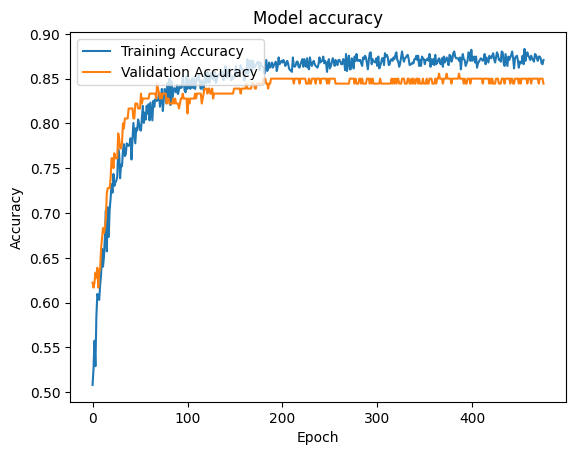

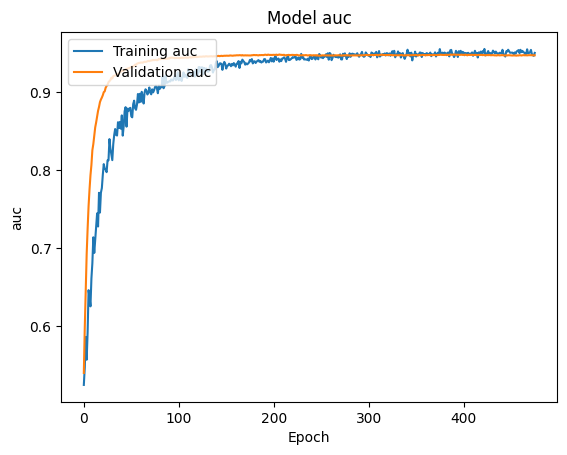

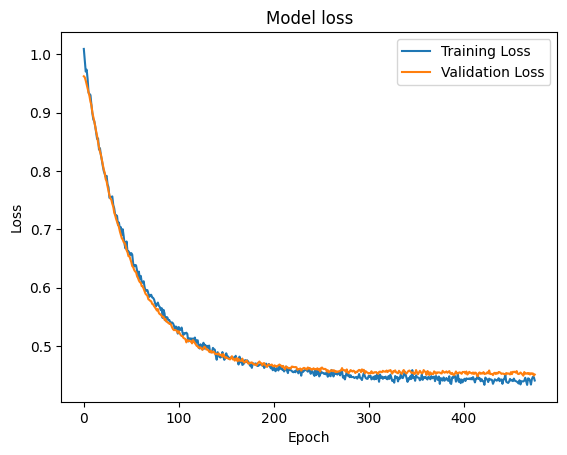

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


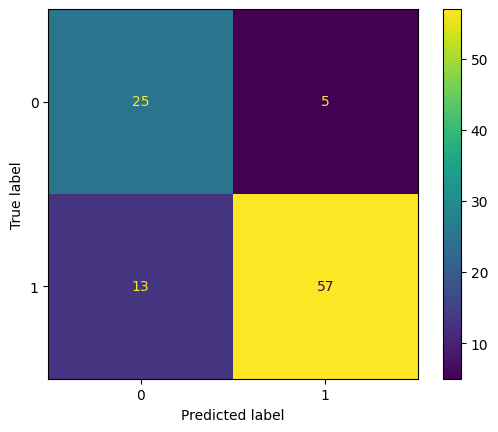

Epoch 1/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7188 - auc: 0.9209 - balanced_accuracy: 0.5535 - f1_score: 0.8405 - loss: 0.9552 - precision: 0.9474
Epoch 1: val_loss improved from inf to 1.05389, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5343 - auc: 0.6857 - balanced_accuracy: 0.5364 - f1_score: 0.8403 - loss: 1.0220 - precision: 0.7321 - val_accuracy: 0.3722 - val_auc: 0.5393 - val_balanced_accuracy: 0.5013 - val_f1_score: 0.8397 - val_loss: 1.0539 - val_precision: 0.7600
Epoch 2/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5938 - auc: 0.6865 - balanced_accuracy: 0.5000 - f1_score: 0.8397 - loss: 0.9451 - precision: 0.5714
Epoch 2: val_loss improved from 1.05389 to 1.02520, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5105 - auc: 0.5132 - balanced_accuracy: 0.5012 - f1_score: 0.8395 - loss: 1.0084 - precision: 0.4791 - val_accuracy: 0.4000 - val_auc: 0

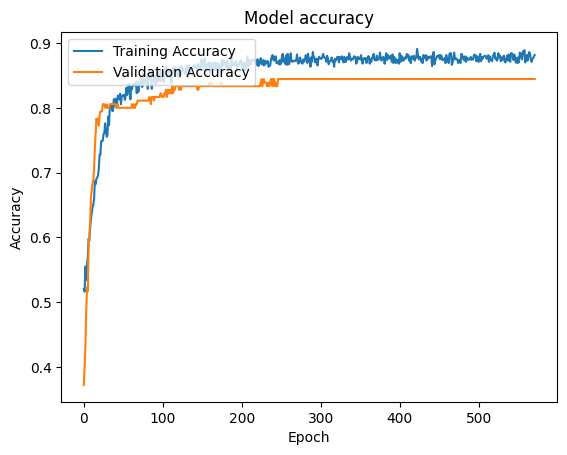

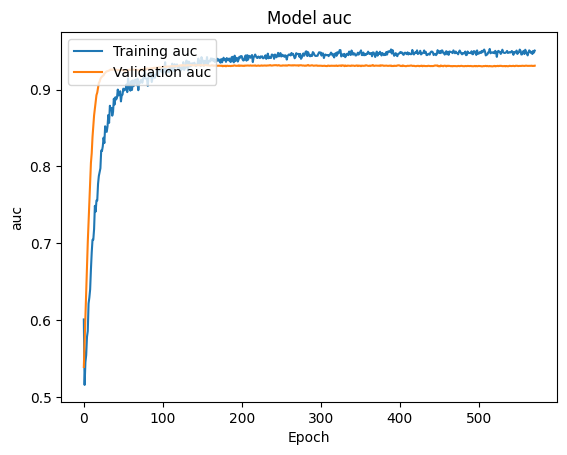

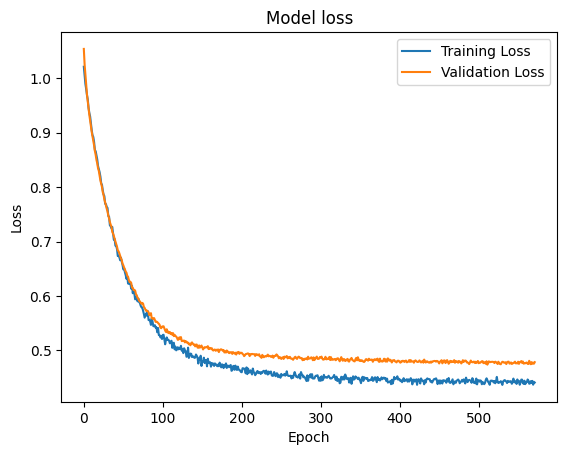

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


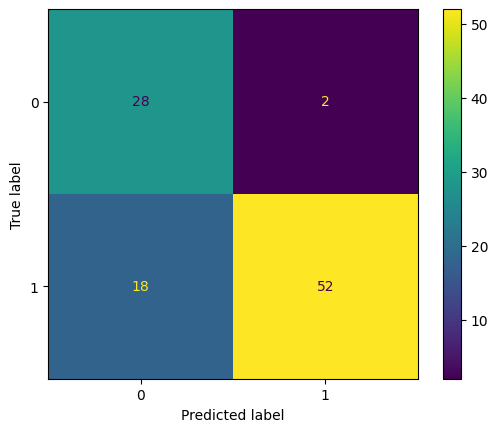

Epoch 1/600
21/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4643 - auc: 0.6978 - balanced_accuracy: 0.4752 - f1_score: 0.8447 - loss: 1.0319 - precision: 0.6191 
Epoch 1: val_loss improved from inf to 0.92734, saving model to model\best_model_01.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4683 - auc: 0.6571 - balanced_accuracy: 0.4791 - f1_score: 0.8447 - loss: 1.0280 - precision: 0.5826 - val_accuracy: 0.6944 - val_auc: 0.4777 - val_balanced_accuracy: 0.4994 - val_f1_score: 0.8445 - val_loss: 0.9273 - val_precision: 0.6983
Epoch 2/600
 1/34 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3438 - auc: 0.6329 - balanced_accuracy: 0.5000 - f1_score: 0.8445 - loss: 1.0608 - precision: 0.3000
Epoch 2: val_loss improved from 0.92734 to 0.92666, saving model to model\best_model_01.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4589 - auc: 0.5214 - balanced_accuracy: 0.4981 - f1_score: 0.8444 - loss: 1.0151 - precision: 0.4504 - val_accuracy: 0.6833 - val_auc: 

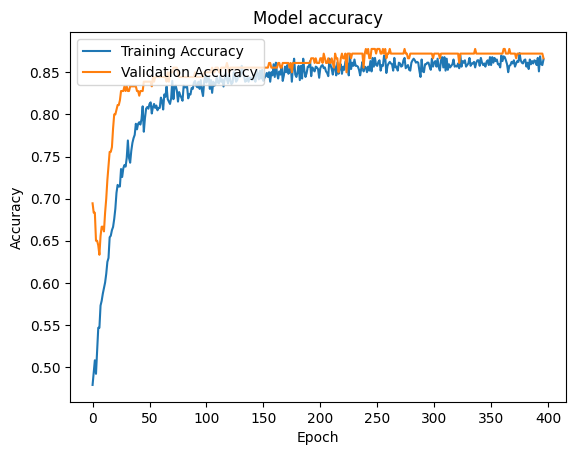

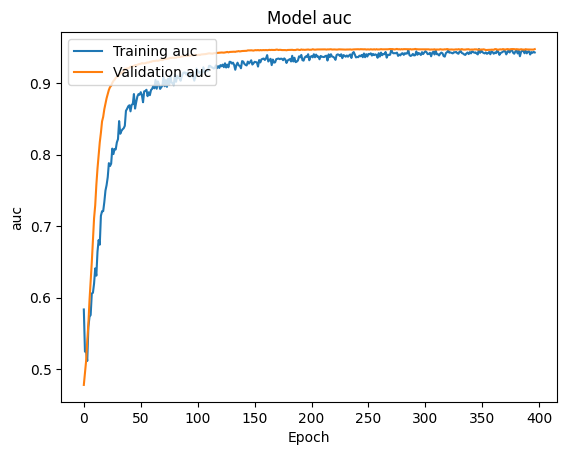

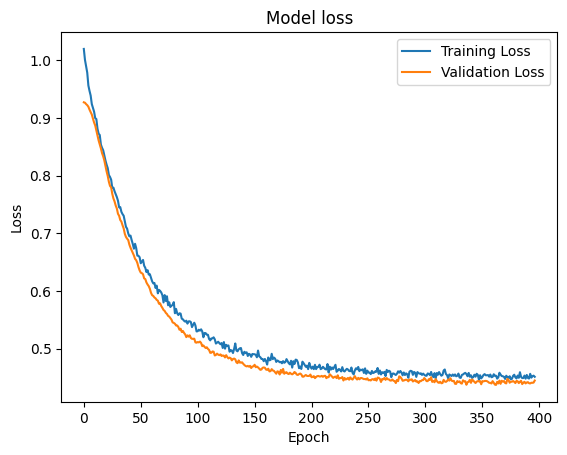

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000020FB37D8E00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


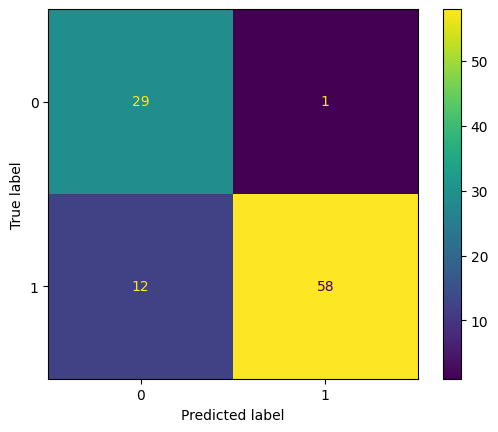

Epoch 1/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6875 - auc: 0.9194 - balanced_accuracy: 0.5560 - f1_score: 0.8406 - loss: 0.9227 - precision: 0.9322
Epoch 1: val_loss improved from inf to 0.99568, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5730 - auc: 0.7220 - balanced_accuracy: 0.5424 - f1_score: 0.8405 - loss: 0.9580 - precision: 0.7445 - val_accuracy: 0.3889 - val_auc: 0.5129 - val_balanced_accuracy: 0.5066 - val_f1_score: 0.8403 - val_loss: 0.9957 - val_precision: 0.6905
Epoch 2/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.5000 - auc: 0.5510 - balanced_accuracy: 0.5000 - f1_score: 0.8403 - loss: 0.9561 - precision: 0.4667
Epoch 2: val_loss improved from 0.99568 to 0.97671, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5644 - auc: 0.5785 - balanced_accuracy: 0.5019 - f1_score: 0.8403 - loss: 0.9481 - precision: 0.5699 - val_accuracy: 0.4444 - val_auc: 

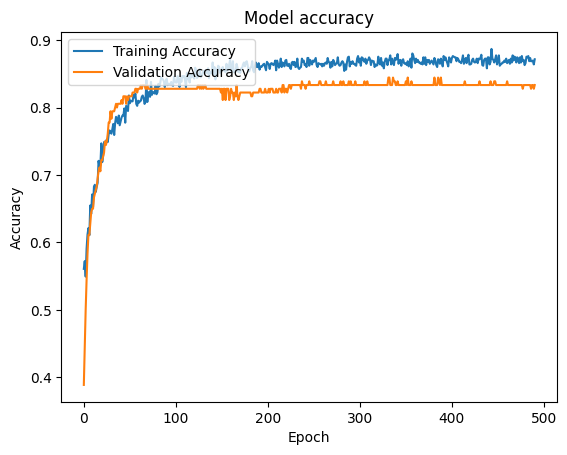

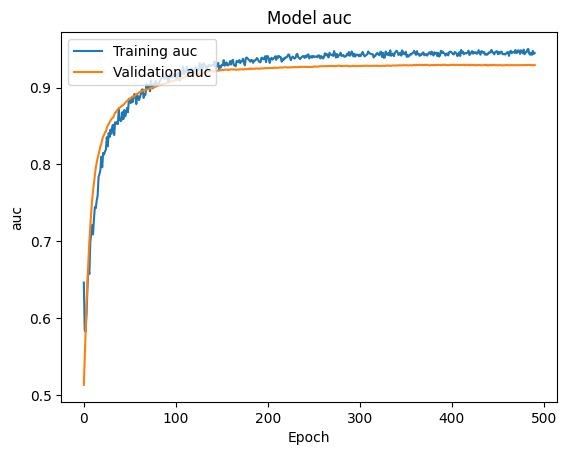

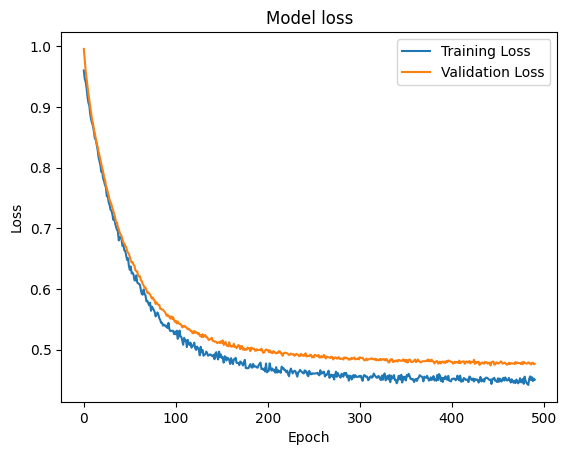

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


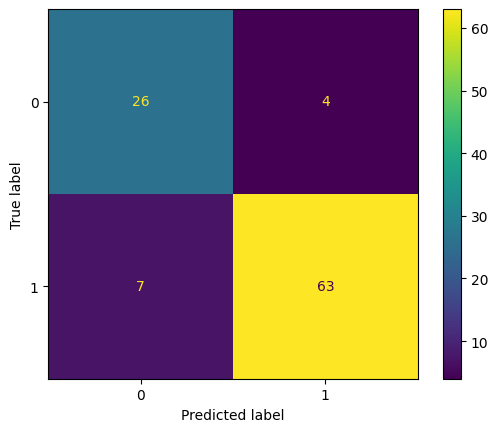

Epoch 1/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 31s 996ms/step - accuracy: 0.5312 - auc: 0.9004 - balanced_accuracy: 0.5135 - f1_score: 0.8404 - loss: 0.9792 - precision: 0.9187
Epoch 1: val_loss improved from inf to 0.99663, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4916 - auc: 0.6689 - balanced_accuracy: 0.5123 - f1_score: 0.8404 - loss: 0.9945 - precision: 0.6406 - val_accuracy: 0.3722 - val_auc: 0.3863 - val_balanced_accuracy: 0.5066 - val_f1_score: 0.8402 - val_loss: 0.9966 - val_precision: 0.5844
Epoch 2/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - auc: 0.4952 - balanced_accuracy: 0.5000 - f1_score: 0.8402 - loss: 0.9940 - precision: 0.7059
Epoch 2: val_loss improved from 0.99663 to 0.98490, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4947 - auc: 0.4870 - balanced_accuracy: 0.5012 - f1_score: 0.8402 - loss: 0.9894 - precision: 0.5032 - val_accuracy: 0.4111 - val_auc

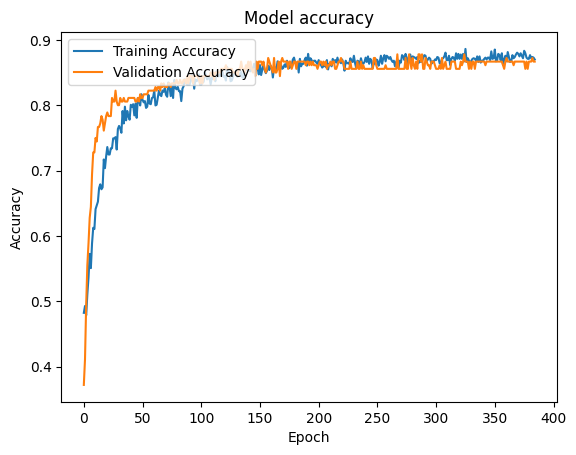

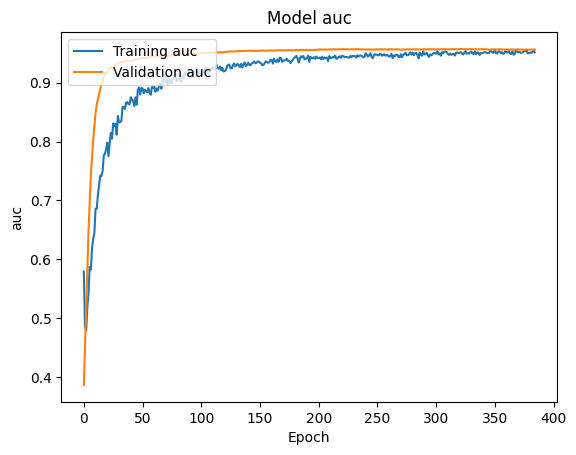

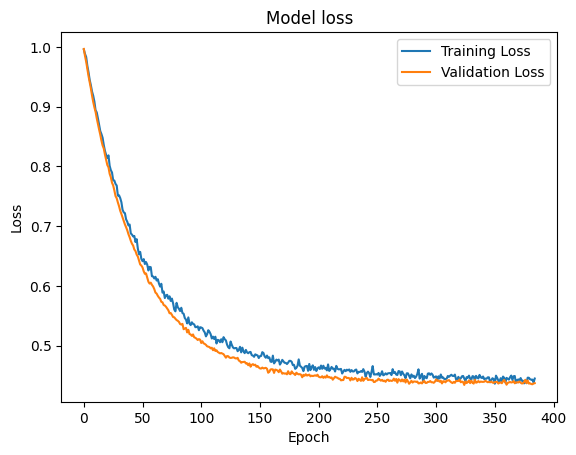

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


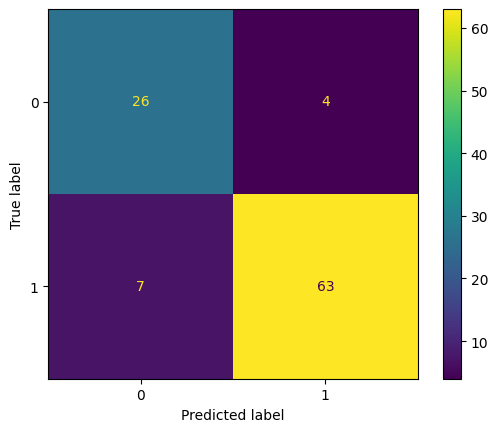

Epoch 1/600
15/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4488 - auc: 0.7253 - balanced_accuracy: 0.4949 - f1_score: 0.8393 - loss: 1.0364 - precision: 0.6822 
Epoch 1: val_loss improved from inf to 0.97169, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.4567 - auc: 0.6464 - balanced_accuracy: 0.4947 - f1_score: 0.8392 - loss: 1.0308 - precision: 0.6148 - val_accuracy: 0.5556 - val_auc: 0.3386 - val_balanced_accuracy: 0.4959 - val_f1_score: 0.8391 - val_loss: 0.9717 - val_precision: 0.6575
Epoch 2/600
 1/32 ━━━━━━━━━━━━━━━━━━━━ 8s 275ms/step - accuracy: 0.4062 - auc: 0.5142 - balanced_accuracy: 0.5000 - f1_score: 0.8391 - loss: 0.9949 - precision: 0.3750
Epoch 2: val_loss improved from 0.97169 to 0.96586, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4492 - auc: 0.4478 - balanced_accuracy: 0.4974 - f1_score: 0.8391 - loss: 1.0142 - precision: 0.4654 - val_accuracy: 0.5278 - val_auc:

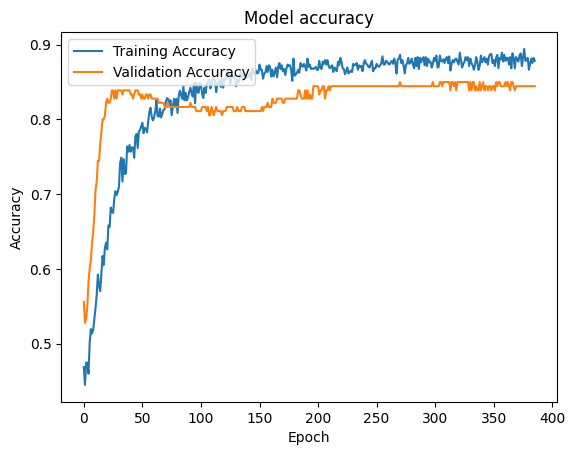

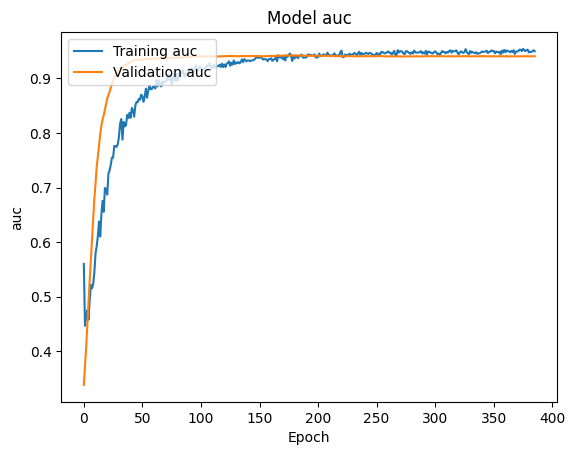

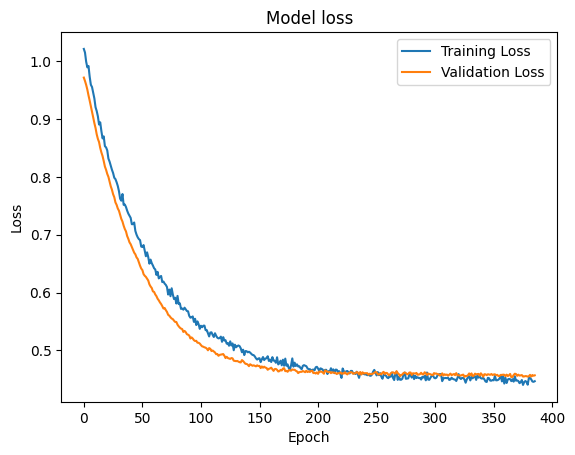

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


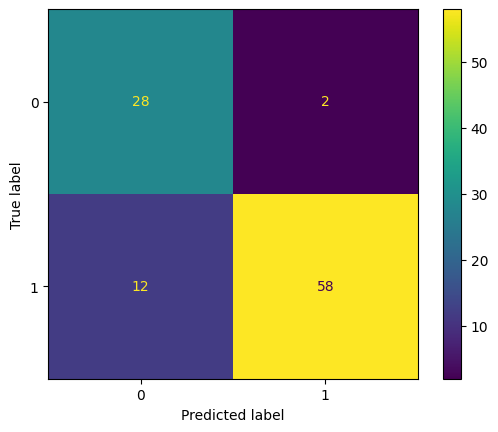

Epoch 1/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5000 - auc: 0.9014 - balanced_accuracy: 0.5222 - f1_score: 0.8394 - loss: 0.9932 - precision: 0.8819
Epoch 1: val_loss improved from inf to 0.96948, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5023 - auc: 0.6884 - balanced_accuracy: 0.5185 - f1_score: 0.8393 - loss: 0.9879 - precision: 0.6572 - val_accuracy: 0.5056 - val_auc: 0.5206 - val_balanced_accuracy: 0.5122 - val_f1_score: 0.8392 - val_loss: 0.9695 - val_precision: 0.6907
Epoch 2/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - auc: 0.5059 - balanced_accuracy: 0.5000 - f1_score: 0.8392 - loss: 0.9761 - precision: 0.4667
Epoch 2: val_loss improved from 0.96948 to 0.95770, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5404 - auc: 0.5491 - balanced_accuracy: 0.5030 - f1_score: 0.8392 - loss: 0.9703 - precision: 0.5388 - val_accuracy: 0.5556 - val_auc: 0

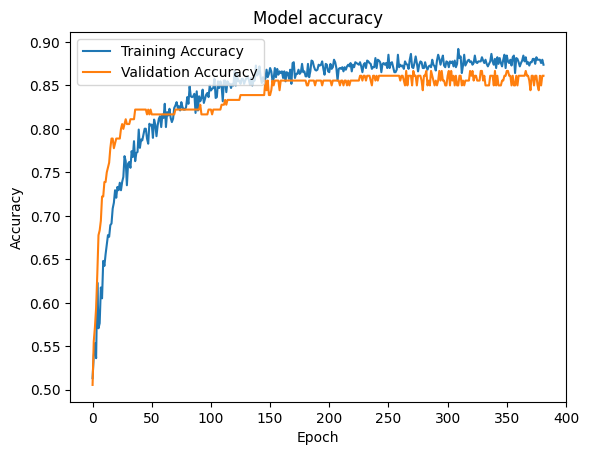

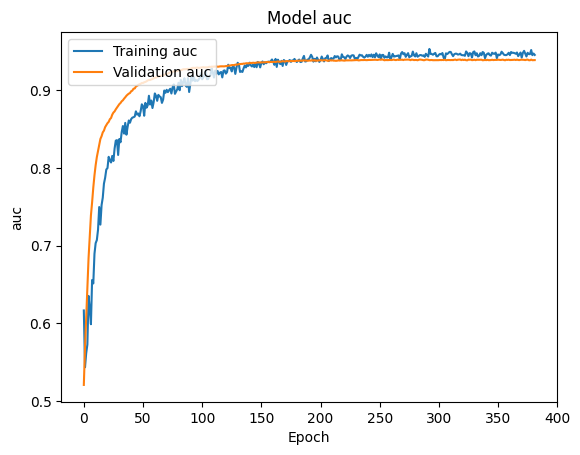

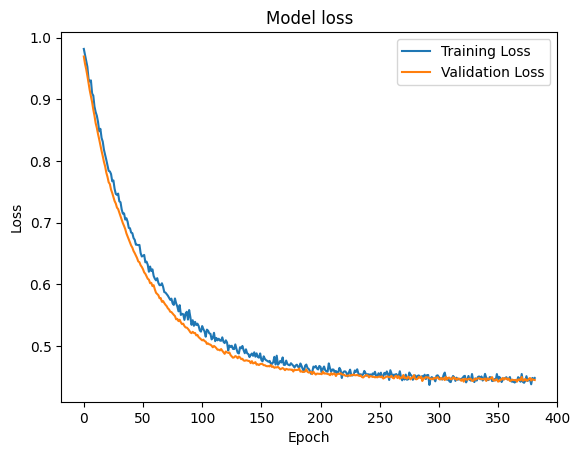

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


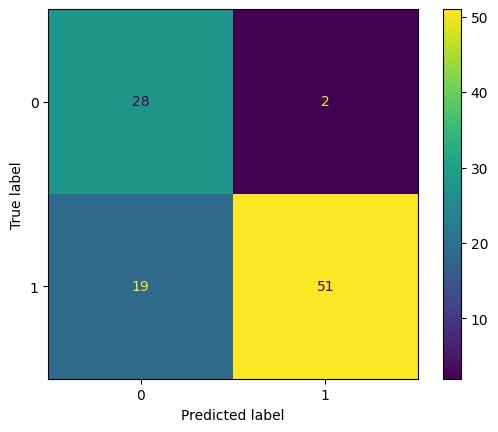

Epoch 1/600
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4997 - auc: 0.7141 - balanced_accuracy: 0.5221 - f1_score: 0.8396 - loss: 1.0088 - precision: 0.6682 
Epoch 1: val_loss improved from inf to 1.00204, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4955 - auc: 0.6738 - balanced_accuracy: 0.5190 - f1_score: 0.8396 - loss: 1.0103 - precision: 0.6330 - val_accuracy: 0.4333 - val_auc: 0.4234 - val_balanced_accuracy: 0.5045 - val_f1_score: 0.8395 - val_loss: 1.0020 - val_precision: 0.6579
Epoch 2/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4062 - auc: 0.3623 - balanced_accuracy: 0.5000 - f1_score: 0.8395 - loss: 1.0379 - precision: 0.3333
Epoch 2: val_loss improved from 1.00204 to 0.99085, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4789 - auc: 0.4835 - balanced_accuracy: 0.4973 - f1_score: 0.8395 - loss: 0.9996 - precision: 0.4632 - val_accuracy: 0.4278 - val_auc: 

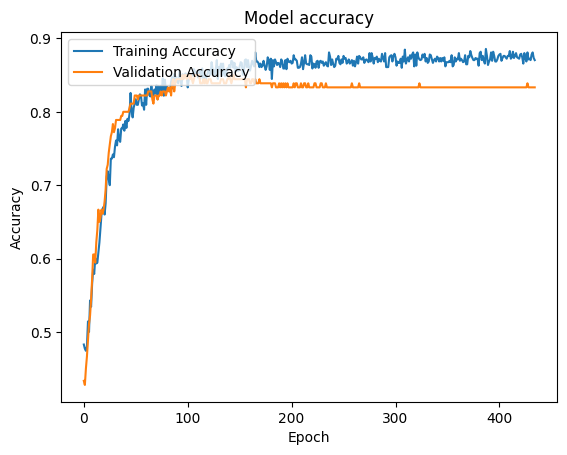

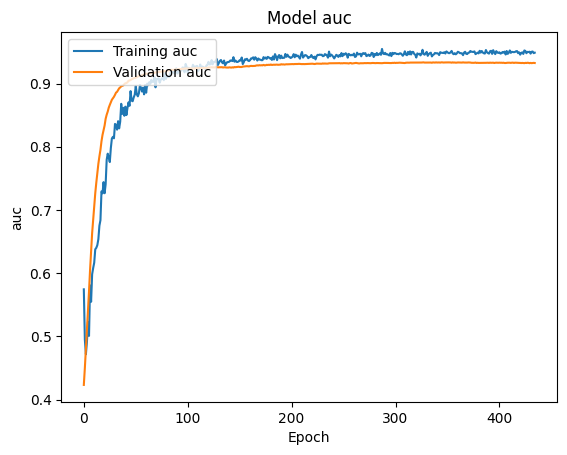

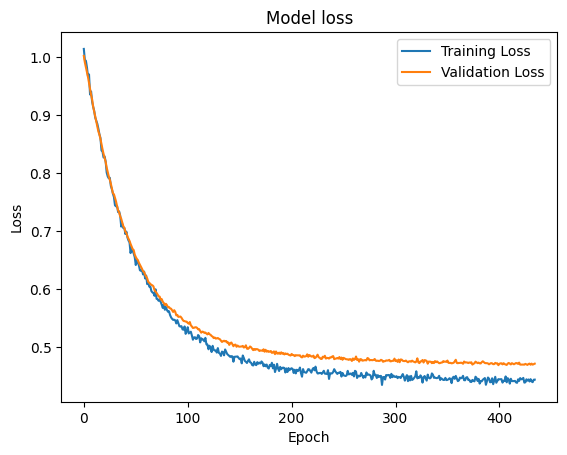

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


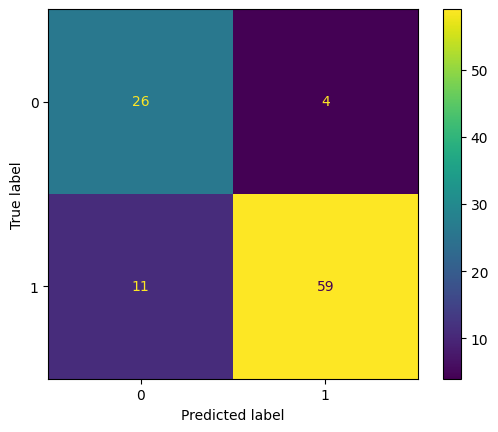

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1:25 3s/step - accuracy: 0.5312 - auc: 0.8992 - balanced_accuracy: 0.5280 - f1_score: 0.8391 - loss: 0.9836 - precision: 0.8926
Epoch 1: val_loss improved from inf to 1.01250, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4743 - auc: 0.6511 - balanced_accuracy: 0.5256 - f1_score: 0.8391 - loss: 1.0135 - precision: 0.6846 - val_accuracy: 0.3056 - val_auc: 0.4042 - val_balanced_accuracy: 0.4989 - val_f1_score: 0.8390 - val_loss: 1.0125 - val_precision: 0.5238
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - auc: 0.4062 - balanced_accuracy: 0.5000 - f1_score: 0.8390 - loss: 0.9867 - precision: 0.2500
Epoch 2: val_loss improved from 1.01250 to 0.99185, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4773 - auc: 0.4639 - balanced_accuracy: 0.5015 - f1_score: 0.8390 - loss: 0.9962 - precision: 0.4738 - val_accuracy: 0.3556 - val_auc: 

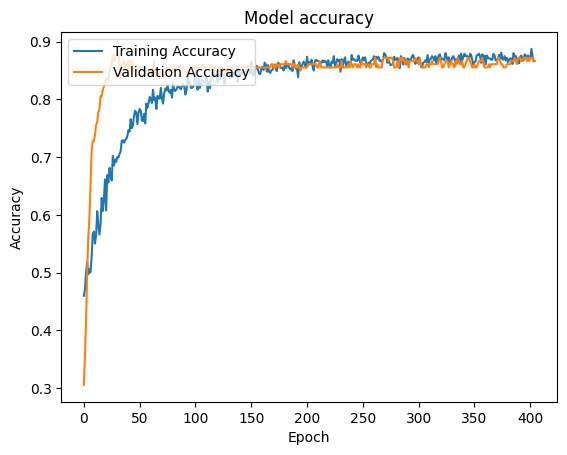

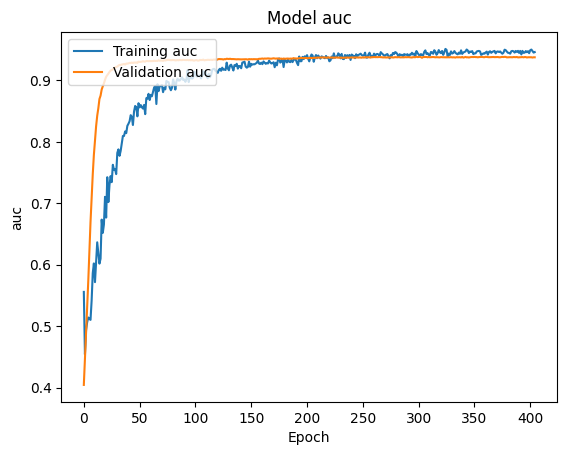

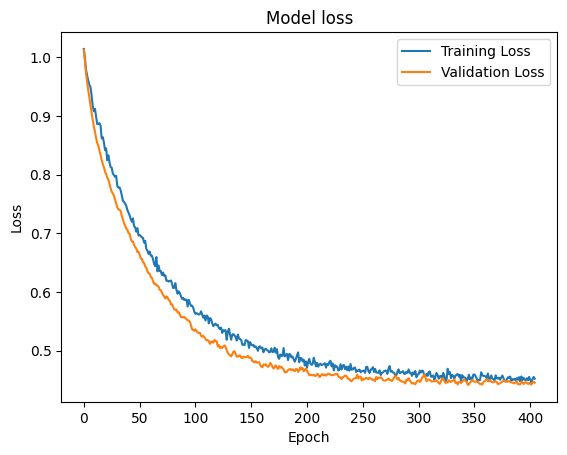

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


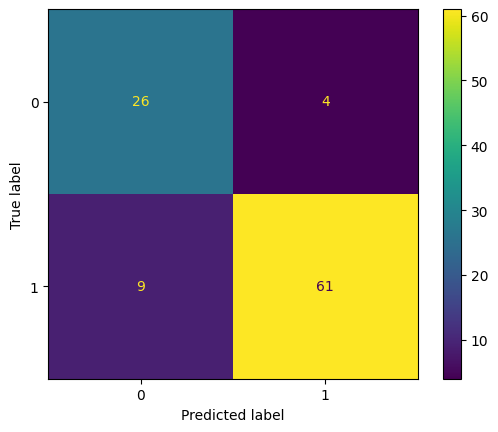

Epoch 1/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4062 - auc: 0.9013 - balanced_accuracy: 0.5210 - f1_score: 0.8397 - loss: 1.0175 - precision: 0.8647
Epoch 1: val_loss improved from inf to 1.04516, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4593 - auc: 0.6580 - balanced_accuracy: 0.5203 - f1_score: 0.8397 - loss: 1.0340 - precision: 0.6400 - val_accuracy: 0.3722 - val_auc: 0.3757 - val_balanced_accuracy: 0.5002 - val_f1_score: 0.8396 - val_loss: 1.0452 - val_precision: 0.5942
Epoch 2/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4688 - auc: 0.4676 - balanced_accuracy: 0.5000 - f1_score: 0.8396 - loss: 1.0254 - precision: 0.5714
Epoch 2: val_loss improved from 1.04516 to 1.02553, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4857 - auc: 0.4710 - balanced_accuracy: 0.5016 - f1_score: 0.8396 - loss: 1.0165 - precision: 0.4500 - val_accuracy: 0.4000 - val_auc: 0

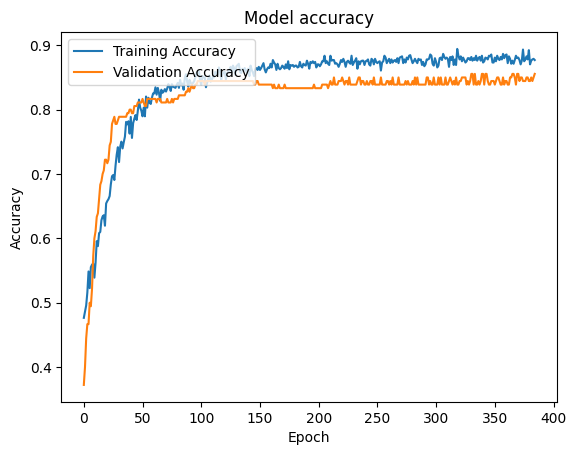

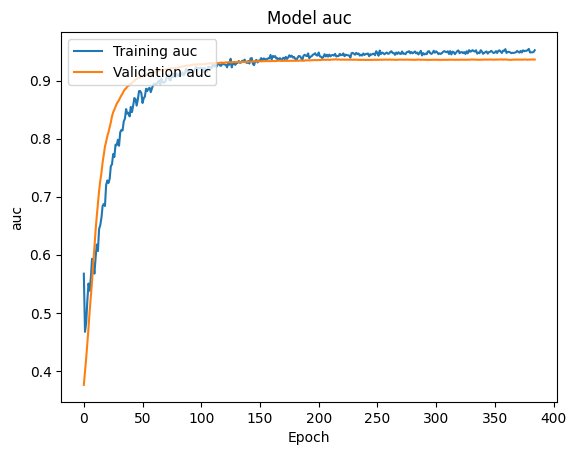

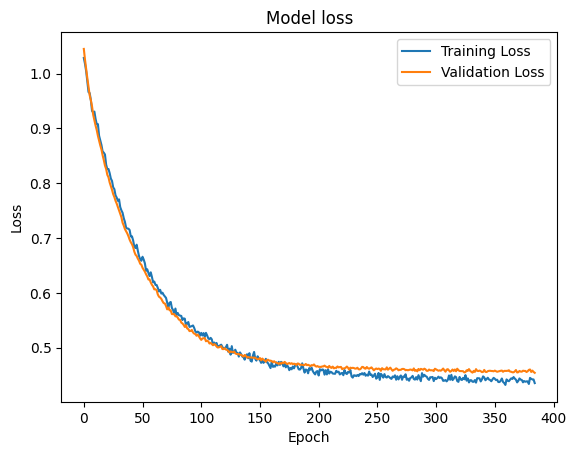

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


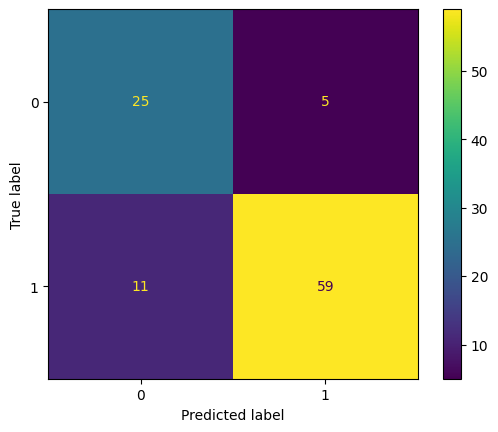

Average Accuracy: 0.8480000019073486
Standard Deviation of CV accuracy:  0.03340657965388092
Average Precision: 0.9471740961074829
Standard Deviation of CV precision:  0.01960172438561452
Average Balanced accuracy: 0.7839698374271393
Standard Deviation of CV Balanced accuracy5tlor49:  0.04027147790771734
Average F1-Score: 0.9230550050735473
Standard Deviation of CV F1:  0.020354969963661387
Average ROC-AUC: 0.9462380707263947
Standard Deviation of CV roc_auc:  0.019020162391160424


In [15]:
adasyn = ADASYN(random_state=200)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=96)

# Initialize metrics lists
accuracies_1 = []
precisions_1 = []
# recalls = []
f1_scores_1 = []
roc_aucs_1 = []
# true_negatives = []
balance_accuracies_1 = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(t_X, Y):
    X_train, X_test = t_X[train_index], t_X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=200)

    adam1_5 = keras.optimizers.Adam(learning_rate=0.0001)

    model1_5 = model.model1(optimizer=adam1_5, metric=metrics, loss=loss)

    X_adasyn, y_adasyn = adasyn.fit_resample(X_train_split, y_train_split)

    early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=60,
    verbose=1,
    mode="min",
    )

    checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'model\\best_model_01.keras',
    monitor= "val_loss",
    verbose=1,
    mode="min",
    save_best_only=True,  # Save only the best model based on the monitored metric
    save_weights_only=False,  # Save the full model (set to True to save only the weights)
    save_freq='epoch'  # Save the model at the end of every epoch
    )
    

    history = model1_5.fit(X_adasyn, y_adasyn, epochs=600, validation_data=(X_val, y_val), callbacks = [early_stopping, checkpoint])

    best_model_1 = load_model('model\\best_model_01.keras')

    loss_and_metrics = best_model_1.evaluate(X_test, y_test)
    print(loss_and_metrics)
    print('Loss = ',loss_and_metrics[0])
    accuracies_1.append(loss_and_metrics[1])
    precisions_1.append(loss_and_metrics[2])
    # recalls.append(loss_and_metrics[3])
    balance_accuracies_1.append(loss_and_metrics[3])
    f1_scores_1.append(loss_and_metrics[4])
    roc_aucs_1.append(loss_and_metrics[5])
    # true_negatives.append(loss_and_metrics[6])
    

    plot.plotAccuracy(history)
    plot.plotAUC(history)

    plot.plotLoss(history)

    plot.plotConfusionMatrix(model= best_model_1, X_test=X_test, y_test=y_test)

# Calculate the average of the metrics
average_accuracy = np.mean(accuracies_1)
average_precision = np.mean(precisions_1) 
# average_recall = np.mean(recalls)
average_B_accuracy = np.mean(balance_accuracies_1)
average_f1_score = np.mean(f1_scores_1)
average_roc_auc = np.mean(roc_aucs_1)
# average_true_negative = np.mean(true_negatives)


# Display the metrics
print(f"Average Accuracy: {average_accuracy}")
print("Standard Deviation of CV accuracy: ", np.std(accuracies_1))
print(f"Average Precision: {average_precision}")
print("Standard Deviation of CV precision: ", np.std(precisions_1))
# print(f"Average Recall: {average_recall}")
# print("Standard Deviation of CV recall: ", np.std(recalls))
print(f"Average Balanced accuracy: {average_B_accuracy}")
print("Standard Deviation of CV Balanced accuracy5tlor49: ", np.std(balance_accuracies_1))
print(f"Average F1-Score: {average_f1_score}")
print("Standard Deviation of CV F1: ", np.std(f1_scores_1))
print(f"Average ROC-AUC: {average_roc_auc}")
print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs_1))
# print(f"Average true negative: {average_true_negative}")
# print("Standard Deviation of CV true_negative: ", np.std(true_negatives))

## Model 2 layers

In [16]:
# adam2 = keras.optimizers.Adam(learning_rate=0.0001)

In [17]:
# model2 = model.model2(optimizer= adam2, metric= metrics)

In [18]:
# model2.summary()

In [19]:
# kf = KFold(n_splits=10, shuffle=True, random_state=42)


# # Initialize metrics lists
# accuracies = []
# precisions = []
# # recalls = []
# f1_scores = []
# roc_aucs = []
# # true_negatives = []
# balance_accuracies = []
# confusion_matrices = []

# # Perform KFold cross-validation
# for train_index, test_index in kf.split(t_X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train, y_test = Y[train_index], Y[test_index]
    
#     model2.fit(X_train, y_train, epochs=100)

#     loss_and_metrics = model2.evaluate(X_test, y_test)
#     print(loss_and_metrics)
#     print('Loss = ',loss_and_metrics[0])
#     accuracies.append(loss_and_metrics[1])
#     precisions.append(loss_and_metrics[2])
#     # recalls.append(loss_and_metrics[3])
#     balance_accuracies.append(loss_and_metrics[3])
#     f1_scores.append(loss_and_metrics[4])
#     roc_aucs.append(loss_and_metrics[5])
#     # true_negatives.append(loss_and_metrics[6])
    


#     predicted = model2.predict(X_test)
#     predicted = tf.squeeze(predicted)
#     predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
#     actual = np.array(y_test)
#     conf_mat = confusion_matrix(actual, predicted)
#     displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
#     displ.plot()


# # Calculate the average of the metrics
# average_accuracy = np.mean(accuracies)
# average_precision = np.mean(precisions)
# # average_recall = np.mean(recalls)
# average_B_accuracy = np.mean(balance_accuracies)
# average_f1_score = np.mean(f1_scores)
# average_roc_auc = np.mean(roc_aucs)
# # average_true_negative = np.mean(true_negatives)


# # Display the metrics
# print(f"Average Accuracy: {average_accuracy}")
# print("Standard Deviation of CV accuracy: ", np.std(accuracies))
# print(f"Average Precision: {average_precision}")
# print("Standard Deviation of CV precision: ", np.std(precisions))
# # print(f"Average Recall: {average_recall}")
# # print("Standard Deviation of CV recall: ", np.std(recalls))
# print(f"Average Balanced accuracy: {average_B_accuracy}")
# print("Standard Deviation of CV recall: ", np.std(balance_accuracies))
# print(f"Average F1-Score: {average_f1_score}")
# print("Standard Deviation of CV F1: ", np.std(f1_scores))
# print(f"Average ROC-AUC: {average_roc_auc}")
# print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs))
# # print(f"Average true negative: {average_true_negative}")
# # print("Standard Deviation of CV true_negative: ", np.std(true_negatives))

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5000 - auc: 0.8950 - balanced_accuracy: 0.5045 - f1_score: 0.8395 - loss: 1.4431 - precision: 0.8561
Epoch 1: val_loss improved from inf to 1.36478, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4735 - auc: 0.6553 - balanced_accuracy: 0.4904 - f1_score: 0.8394 - loss: 1.4526 - precision: 0.5955 - val_accuracy: 0.6833 - val_auc: 0.5849 - val_balanced_accuracy: 0.4966 - val_f1_score: 0.8394 - val_loss: 1.3648 - val_precision: 0.7030
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5312 - auc: 0.4917 - balanced_accuracy: 0.5000 - f1_score: 0.8394 - loss: 1.3930 - precision: 0.6087
Epoch 2: val_loss improved from 1.36478 to 1.35255, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5101 - auc: 0.5296 - balanced_accuracy: 0.4967 - f1_score: 0.8394 - loss: 1.4027 - precision: 0.5096 - val_accuracy: 0.6889 - val_auc: 0

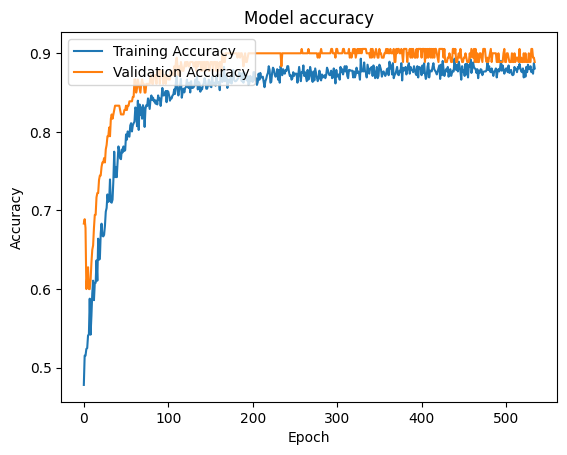

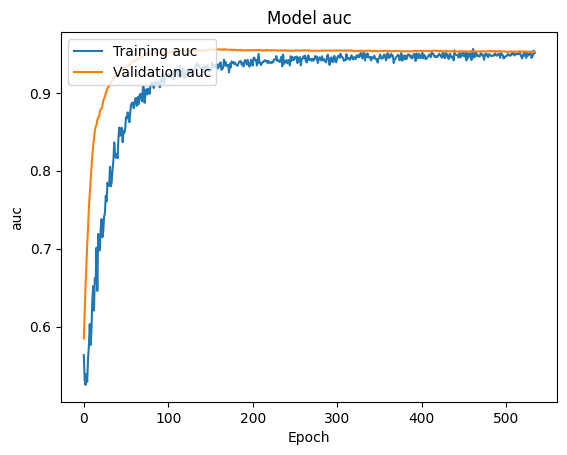

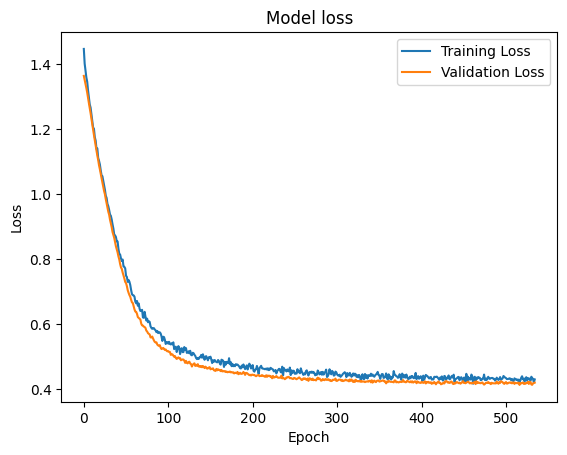

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


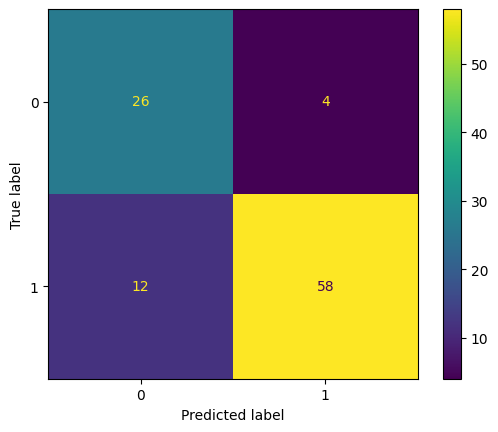

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4688 - auc: 0.9089 - balanced_accuracy: 0.4886 - f1_score: 0.8411 - loss: 1.4684 - precision: 0.8561
Epoch 1: val_loss improved from inf to 1.33553, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5140 - auc: 0.7148 - balanced_accuracy: 0.4950 - f1_score: 0.8411 - loss: 1.4193 - precision: 0.6313 - val_accuracy: 0.6722 - val_auc: 0.7139 - val_balanced_accuracy: 0.5044 - val_f1_score: 0.8411 - val_loss: 1.3355 - val_precision: 0.7254
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5938 - auc: 0.6208 - balanced_accuracy: 0.5000 - f1_score: 0.8411 - loss: 1.3547 - precision: 0.6842
Epoch 2: val_loss improved from 1.33553 to 1.32535, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5571 - auc: 0.5817 - balanced_accuracy: 0.5017 - f1_score: 0.8411 - loss: 1.3809 - precision: 0.5350 - val_accuracy: 0.6778 - val_auc: 0

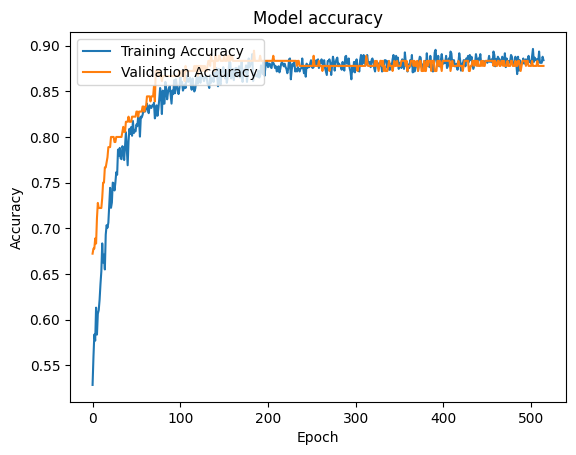

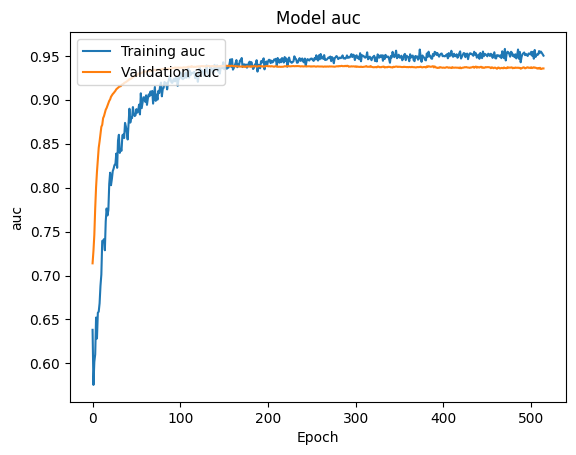

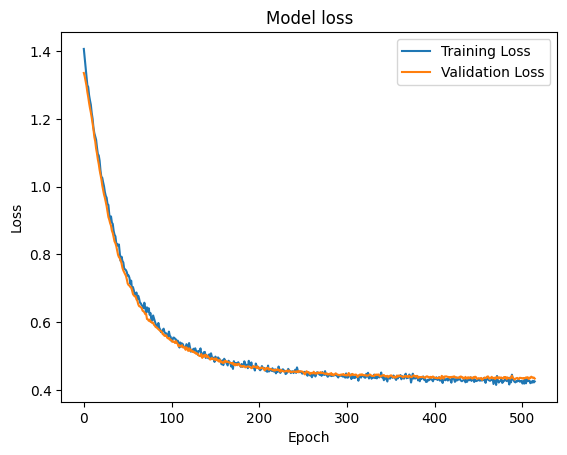

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


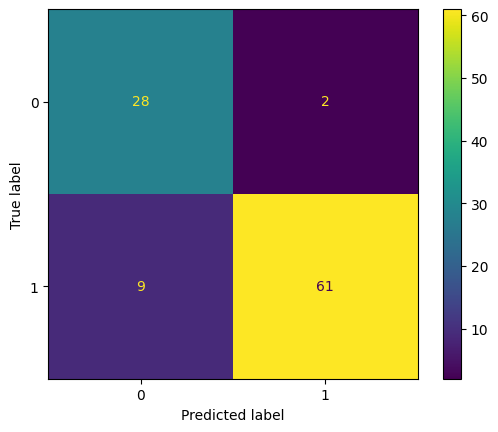

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6562 - auc: 0.9148 - balanced_accuracy: 0.5079 - f1_score: 0.8428 - loss: 1.3571 - precision: 0.8806
Epoch 1: val_loss improved from inf to 1.36162, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5308 - auc: 0.7214 - balanced_accuracy: 0.5004 - f1_score: 0.8428 - loss: 1.3802 - precision: 0.6302 - val_accuracy: 0.6000 - val_auc: 0.6487 - val_balanced_accuracy: 0.5029 - val_f1_score: 0.8428 - val_loss: 1.3616 - val_precision: 0.8118
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4375 - auc: 0.4632 - balanced_accuracy: 0.5000 - f1_score: 0.8428 - loss: 1.3897 - precision: 0.5882
Epoch 2: val_loss improved from 1.36162 to 1.34164, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5168 - auc: 0.5411 - balanced_accuracy: 0.4971 - f1_score: 0.8428 - loss: 1.3643 - precision: 0.5236 - val_accuracy: 0.6278 - val_auc: 0

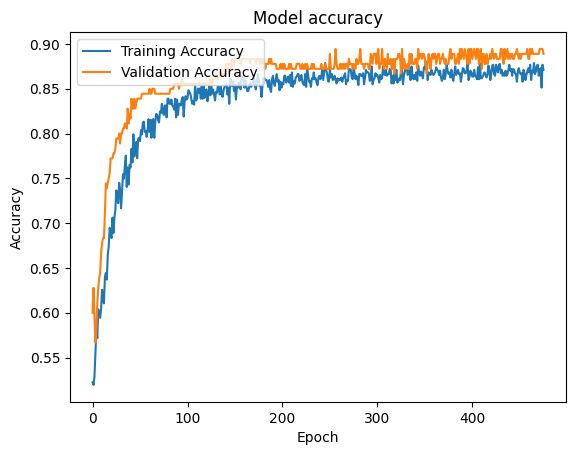

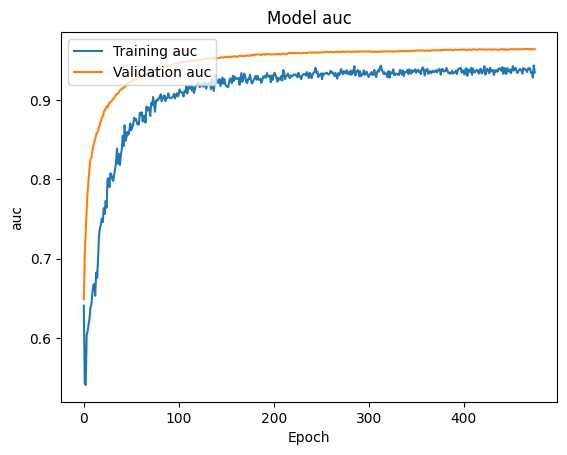

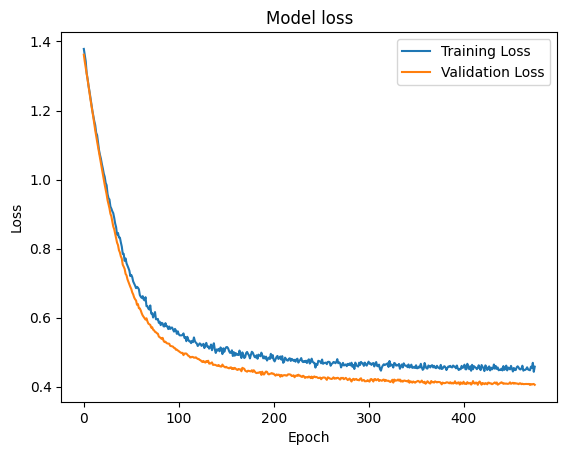

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


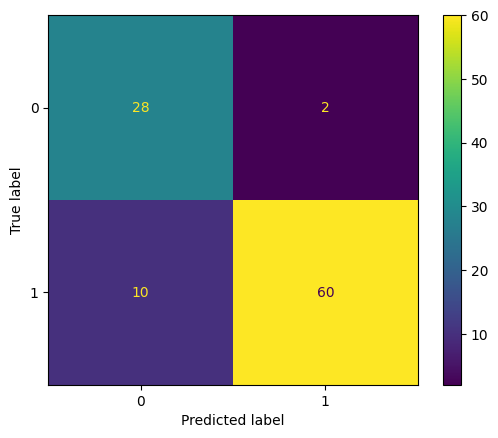

Epoch 1/700
 1/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.3750 - auc: 0.9193 - balanced_accuracy: 0.4998 - f1_score: 0.8427 - loss: 1.4791 - precision: 0.8686
Epoch 1: val_loss improved from inf to 1.37171, saving model to model\best_model_02.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4650 - auc: 0.6811 - balanced_accuracy: 0.4949 - f1_score: 0.8427 - loss: 1.4355 - precision: 0.6239 - val_accuracy: 0.6611 - val_auc: 0.5362 - val_balanced_accuracy: 0.4995 - val_f1_score: 0.8427 - val_loss: 1.3717 - val_precision: 0.6610
Epoch 2/700
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - auc: 0.5430 - balanced_accuracy: 0.5000 - f1_score: 0.8427 - loss: 1.3989 - precision: 0.5000
Epoch 2: val_loss improved from 1.37171 to 1.35130, saving model to model\best_model_02.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5202 - auc: 0.5305 - balanced_accuracy: 0.5027 - f1_score: 0.8426 - loss: 1.3912 - precision: 0.5279 - val_accuracy: 0.6611 - val_auc: 0

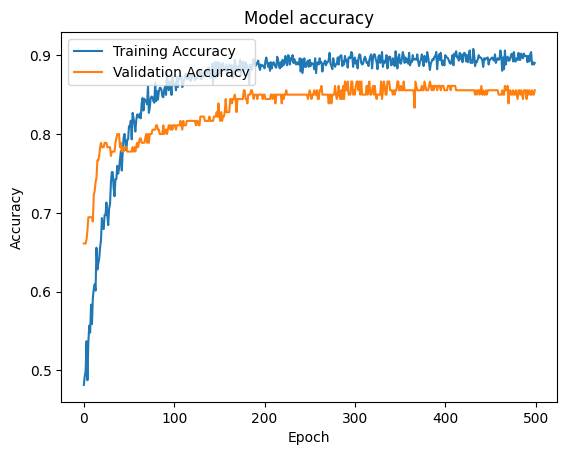

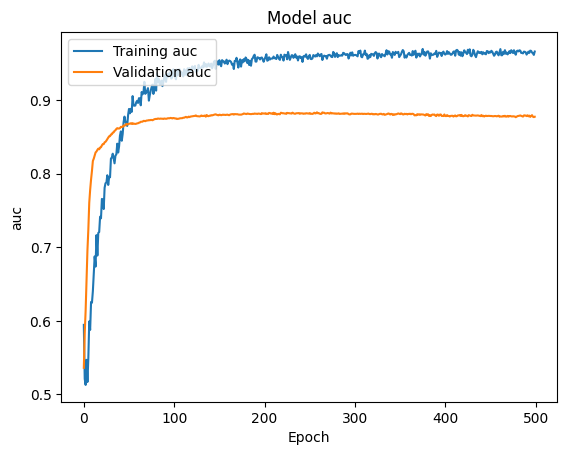

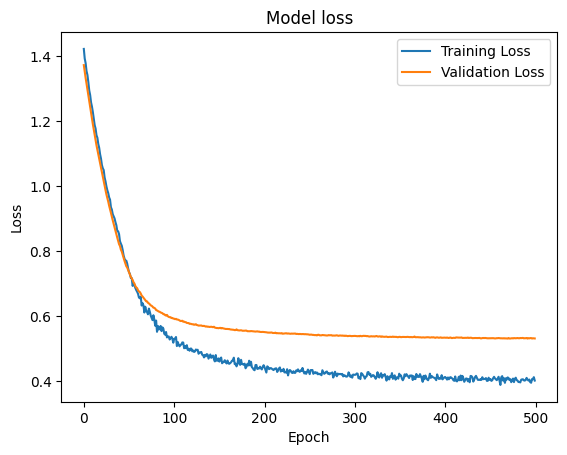

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


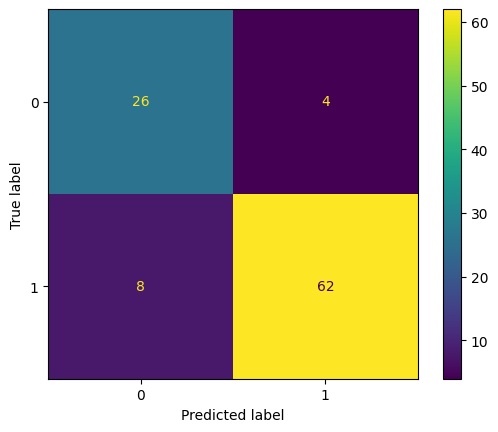

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5000 - auc: 0.8602 - balanced_accuracy: 0.5143 - f1_score: 0.8446 - loss: 1.4493 - precision: 0.8273
Epoch 1: val_loss improved from inf to 1.44138, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4762 - auc: 0.6623 - balanced_accuracy: 0.5209 - f1_score: 0.8446 - loss: 1.4424 - precision: 0.6287 - val_accuracy: 0.3556 - val_auc: 0.4775 - val_balanced_accuracy: 0.4982 - val_f1_score: 0.8445 - val_loss: 1.4414 - val_precision: 0.6471
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5312 - auc: 0.5196 - balanced_accuracy: 0.5000 - f1_score: 0.8445 - loss: 1.4156 - precision: 0.5833
Epoch 2: val_loss improved from 1.44138 to 1.41326, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5071 - auc: 0.4996 - balanced_accuracy: 0.5029 - f1_score: 0.8445 - loss: 1.4128 - precision: 0.4908 - val_accuracy: 0.3722 - val_auc: 0

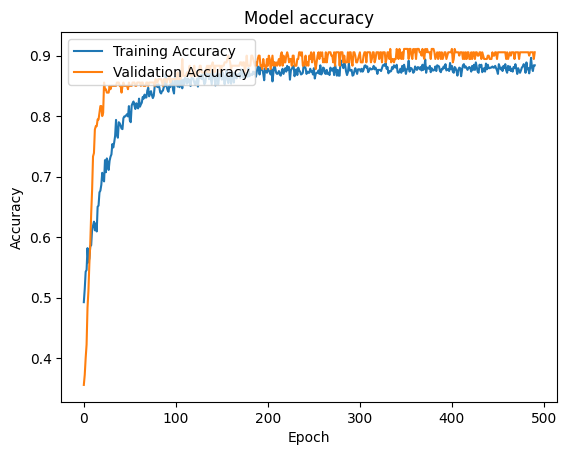

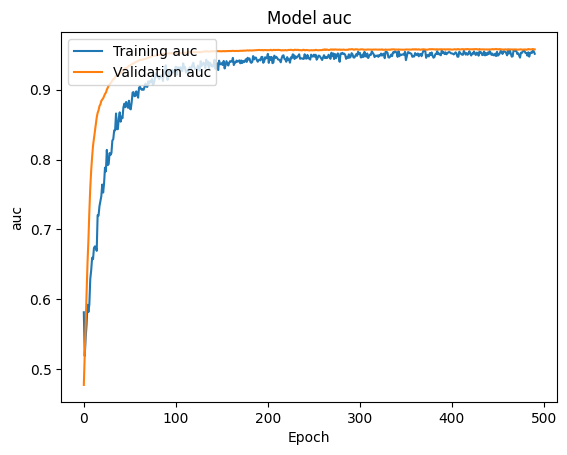

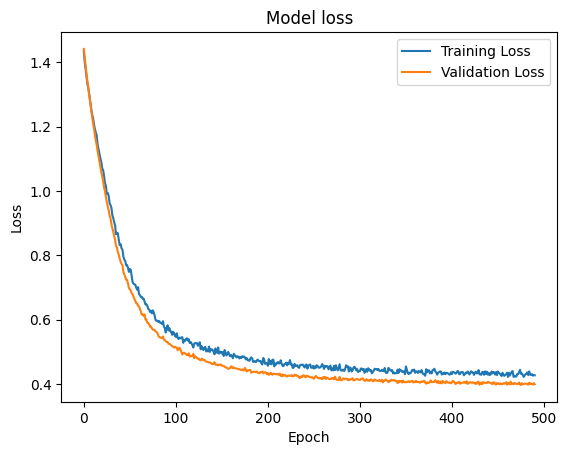

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


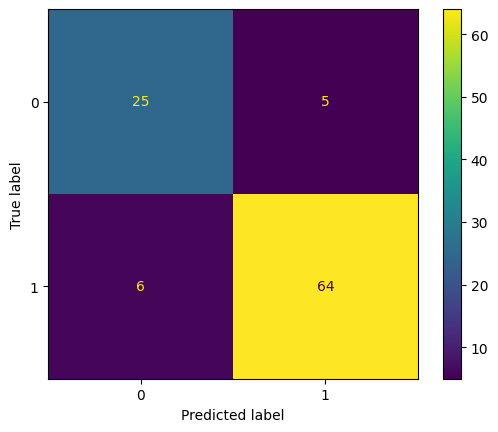

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5312 - auc: 0.9201 - balanced_accuracy: 0.4947 - f1_score: 0.8452 - loss: 1.3995 - precision: 0.8844
Epoch 1: val_loss improved from inf to 1.34618, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4913 - auc: 0.6797 - balanced_accuracy: 0.4851 - f1_score: 0.8452 - loss: 1.4582 - precision: 0.6072 - val_accuracy: 0.6944 - val_auc: 0.5235 - val_balanced_accuracy: 0.4993 - val_f1_score: 0.8452 - val_loss: 1.3462 - val_precision: 0.6983
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4062 - auc: 0.4417 - balanced_accuracy: 0.5000 - f1_score: 0.8452 - loss: 1.4819 - precision: 0.3704
Epoch 2: val_loss improved from 1.34618 to 1.33569, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5094 - auc: 0.5679 - balanced_accuracy: 0.5047 - f1_score: 0.8452 - loss: 1.4140 - precision: 0.4844 - val_accuracy: 0.6889 - val_auc: 0

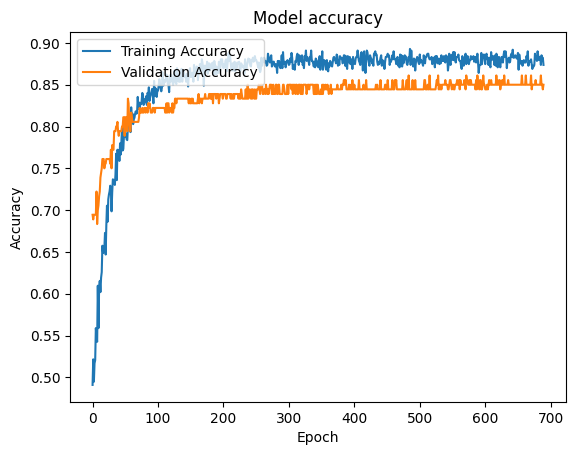

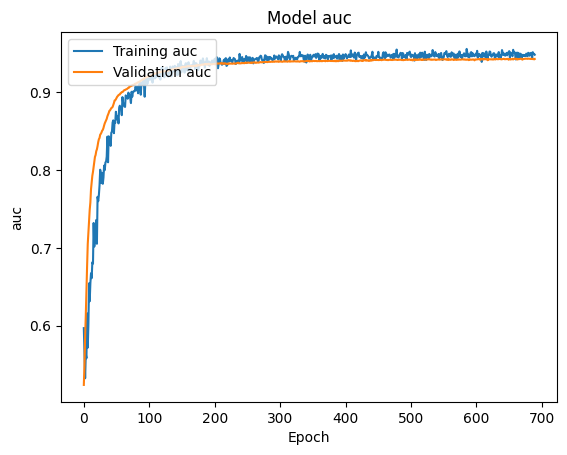

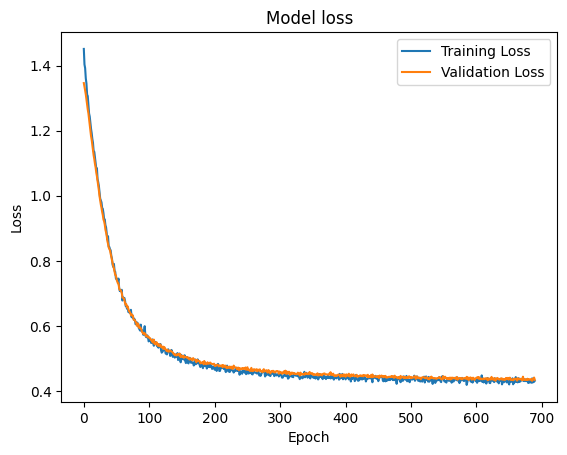

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


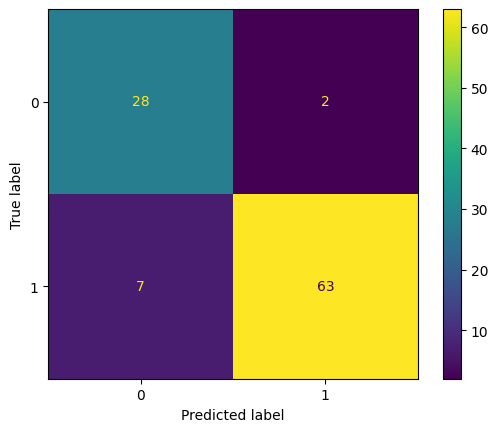

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5312 - auc: 0.8840 - balanced_accuracy: 0.4850 - f1_score: 0.8461 - loss: 1.5773 - precision: 0.8571
Epoch 1: val_loss improved from inf to 1.29580, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4899 - auc: 0.6555 - balanced_accuracy: 0.4753 - f1_score: 0.8461 - loss: 1.6310 - precision: 0.5939 - val_accuracy: 0.7111 - val_auc: 0.6960 - val_balanced_accuracy: 0.5000 - val_f1_score: 0.8461 - val_loss: 1.2958 - val_precision: 0.7111
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5625 - auc: 0.2833 - balanced_accuracy: 0.5000 - f1_score: 0.8461 - loss: 1.5593 - precision: 0.6000
Epoch 2: val_loss improved from 1.29580 to 1.28834, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5016 - auc: 0.5302 - balanced_accuracy: 0.5026 - f1_score: 0.8460 - loss: 1.5243 - precision: 0.4921 - val_accuracy: 0.7167 - val_auc: 0

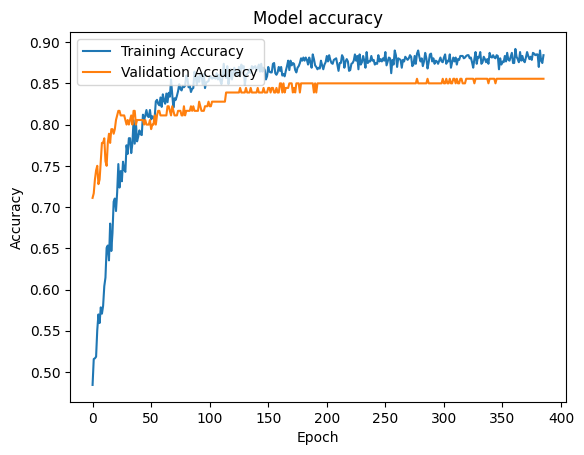

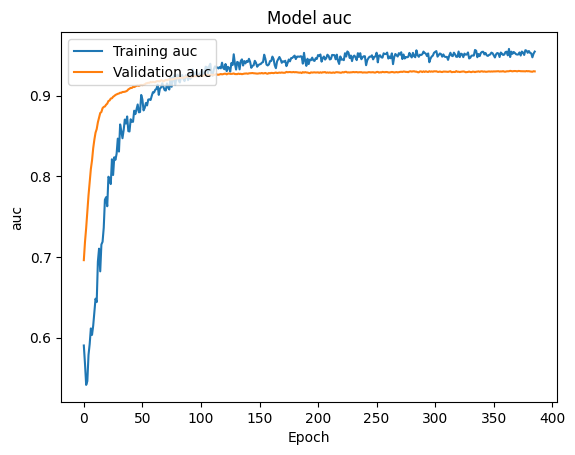

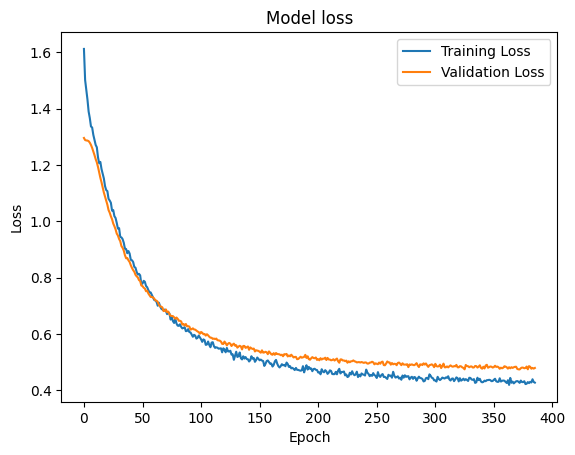

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


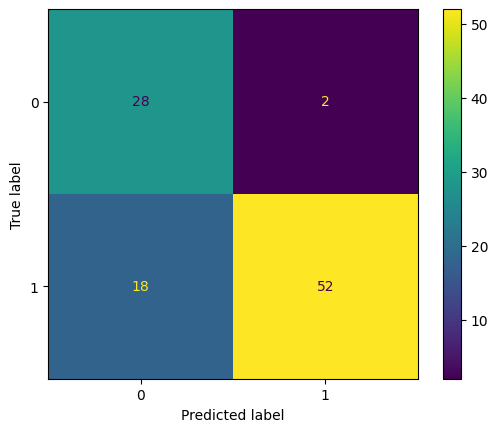

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5938 - auc: 0.8970 - balanced_accuracy: 0.5038 - f1_score: 0.8460 - loss: 1.3792 - precision: 0.9000
Epoch 1: val_loss improved from inf to 1.35746, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5041 - auc: 0.6751 - balanced_accuracy: 0.5019 - f1_score: 0.8460 - loss: 1.4085 - precision: 0.6318 - val_accuracy: 0.6389 - val_auc: 0.5480 - val_balanced_accuracy: 0.5025 - val_f1_score: 0.8460 - val_loss: 1.3575 - val_precision: 0.6948
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4375 - auc: 0.4785 - balanced_accuracy: 0.5000 - f1_score: 0.8460 - loss: 1.3909 - precision: 0.4444
Epoch 2: val_loss improved from 1.35746 to 1.34188, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5358 - auc: 0.5321 - balanced_accuracy: 0.5009 - f1_score: 0.8460 - loss: 1.3797 - precision: 0.5199 - val_accuracy: 0.6278 - val_auc: 0

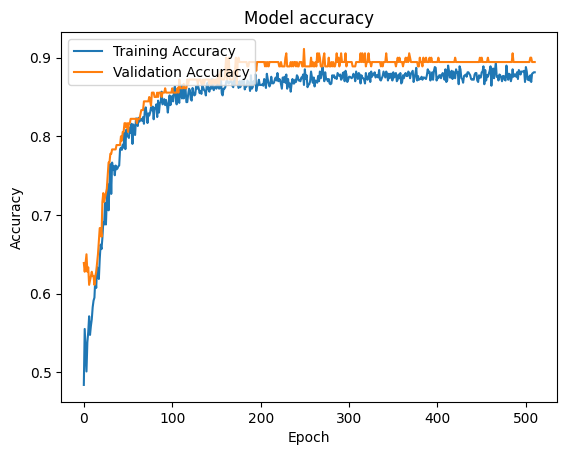

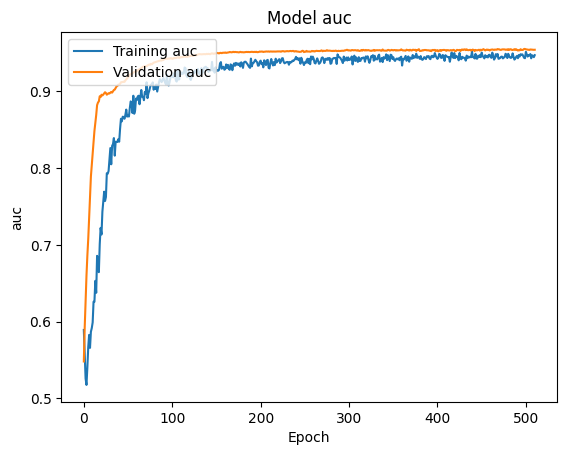

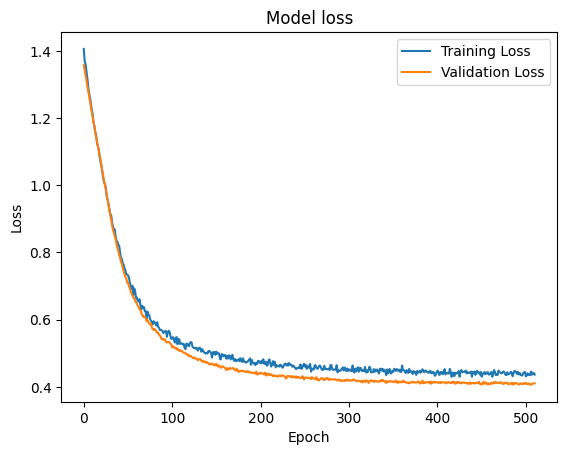

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


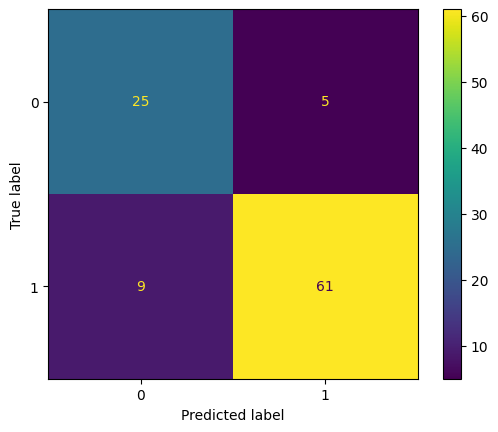

Epoch 1/700
 1/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5938 - auc: 0.9205 - balanced_accuracy: 0.4950 - f1_score: 0.8463 - loss: 1.3858 - precision: 0.8889
Epoch 1: val_loss improved from inf to 1.38110, saving model to model\best_model_02.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4934 - auc: 0.6733 - balanced_accuracy: 0.4937 - f1_score: 0.8463 - loss: 1.4519 - precision: 0.6279 - val_accuracy: 0.6444 - val_auc: 0.3525 - val_balanced_accuracy: 0.4997 - val_f1_score: 0.8463 - val_loss: 1.3811 - val_precision: 0.6686
Epoch 2/700
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - auc: 0.4603 - balanced_accuracy: 0.5000 - f1_score: 0.8463 - loss: 1.4495 - precision: 0.4583
Epoch 2: val_loss improved from 1.38110 to 1.37070, saving model to model\best_model_02.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5214 - auc: 0.4961 - balanced_accuracy: 0.4976 - f1_score: 0.8463 - loss: 1.4258 - precision: 0.5182 - val_accuracy: 0.5667 - val_auc: 0

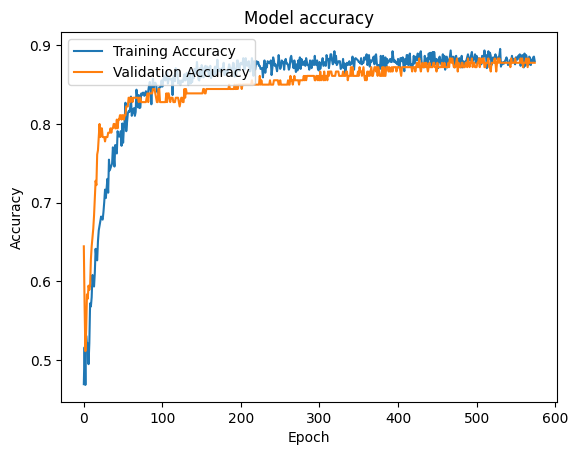

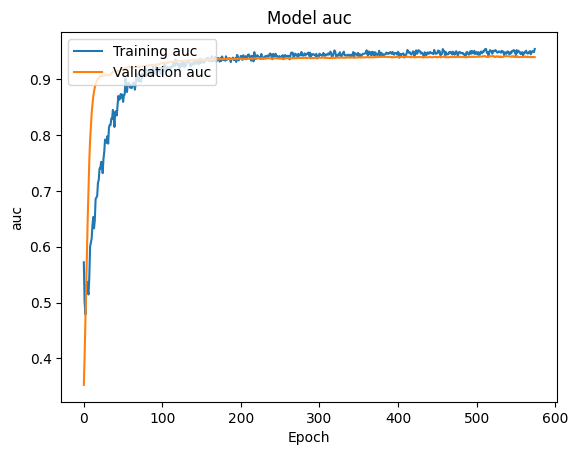

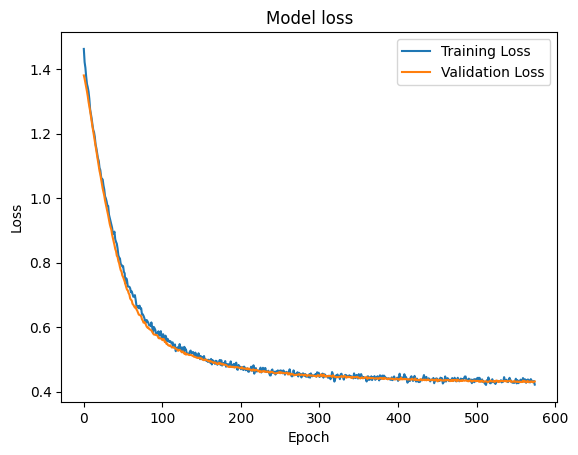

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


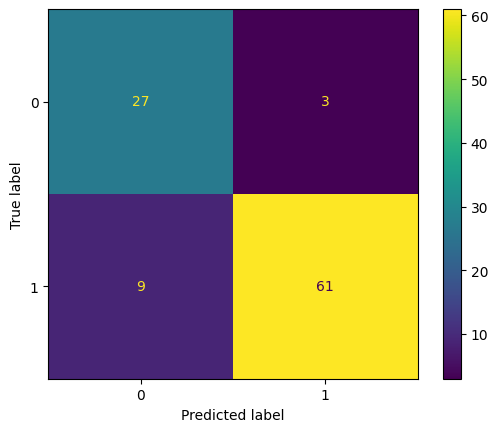

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3125 - auc: 0.9087 - balanced_accuracy: 0.4946 - f1_score: 0.8470 - loss: 1.4572 - precision: 0.9174
Epoch 1: val_loss improved from inf to 1.38932, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5283 - auc: 0.7419 - balanced_accuracy: 0.5260 - f1_score: 0.8470 - loss: 1.3908 - precision: 0.7754 - val_accuracy: 0.3556 - val_auc: 0.8344 - val_balanced_accuracy: 0.5010 - val_f1_score: 0.8470 - val_loss: 1.3893 - val_precision: 1.0000
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5938 - auc: 0.6781 - balanced_accuracy: 0.5000 - f1_score: 0.8470 - loss: 1.3629 - precision: 0.8750
Epoch 2: val_loss improved from 1.38932 to 1.36009, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5411 - auc: 0.5750 - balanced_accuracy: 0.5066 - f1_score: 0.8470 - loss: 1.3685 - precision: 0.5877 - val_accuracy: 0.4278 - val_auc: 0

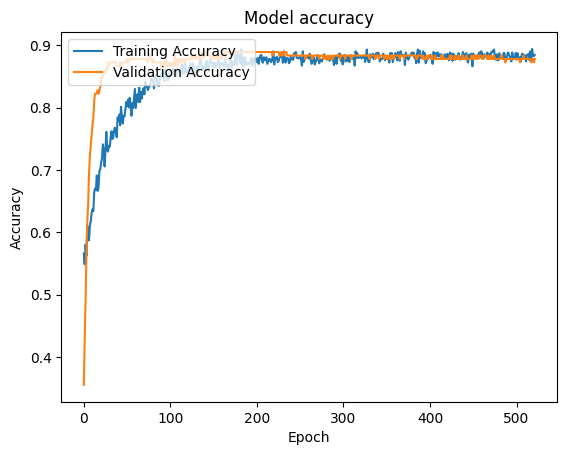

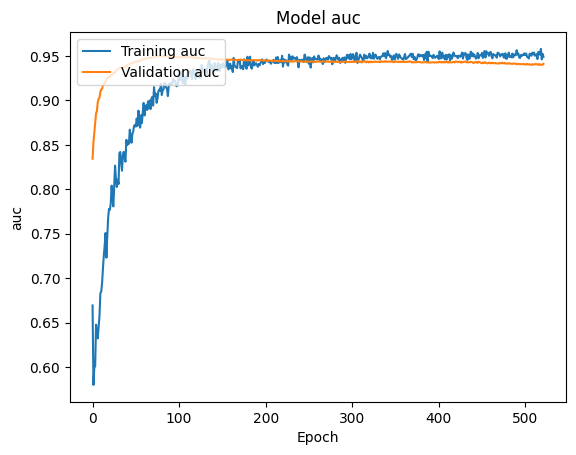

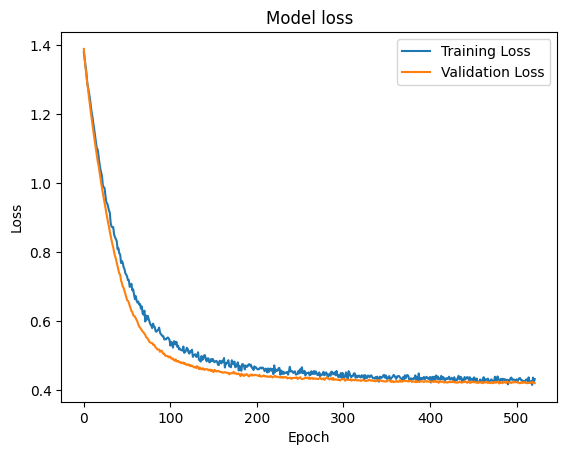

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


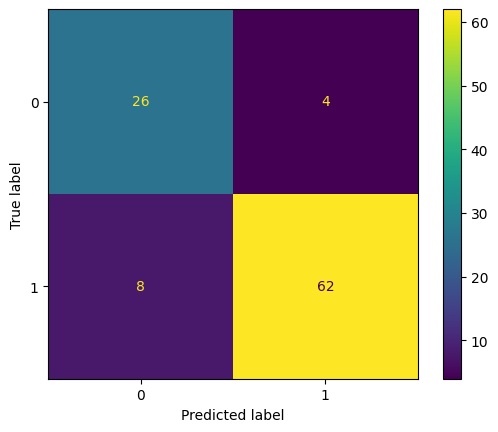

Average Accuracy: 0.8709999978542328
Standard Deviation of CV accuracy:  0.029478806342273064
Average Precision: 0.9487365067005158
Standard Deviation of CV precision:  0.016683563502735914
Average Balanced accuracy: 0.7879620134830475
Standard Deviation of CV Balanced accuracy:  0.03684097756257748
Average F1-Score: 0.9362062573432922
Standard Deviation of CV F1:  0.018239313427102683
Average ROC-AUC: 0.948547613620758
Standard Deviation of CV roc_auc:  0.016764839187483428


In [20]:
adasyn = ADASYN(random_state=200)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=96)

# Initialize metrics lists
accuracies_2 = []
precisions_2 = []
# recalls = []
f1_scores_2 = []
roc_aucs_2 = []
# true_negatives = []
balance_accuracies_2 = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(t_X, Y):
    X_train, X_test = t_X[train_index], t_X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=200)

    adam2_5 = keras.optimizers.Adam(learning_rate=0.0001)

    model2_5 = model.model2(optimizer=adam2_5, metric=metrics, loss=loss)

    X_adasyn, y_adasyn = adasyn.fit_resample(X_train_split, y_train_split)

    # early_stopping = Stop_AL.EarlyStopAccLoss(
    # min_delta=0.001,
    # min_delta_loss = 0.01,
    # patience_auc=100,
    # verbose=1,
    # )

    # checkpoint = Checkpoint_A.CheckpointBestAUC(min_delta_loss = 0.01)

    early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=60,
    verbose=1,
    mode="min",
    )

    checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'model\\best_model_02.keras',
    monitor= "val_loss",
    verbose=1,
    mode="min",
    save_best_only=True,  # Save only the best model based on the monitored metric
    save_weights_only=False,  # Save the full model (set to True to save only the weights)
    save_freq='epoch'  # Save the model at the end of every epoch
    )
    

    
    history = model2_5.fit(X_adasyn, y_adasyn, epochs=700, validation_data=(X_val, y_val), callbacks = [early_stopping, checkpoint])

    best_model_2 = load_model('model\\best_model_02.keras')

    loss_and_metrics = best_model_2.evaluate(X_test, y_test)
    print(loss_and_metrics)
    print('Loss = ',loss_and_metrics[0])
    accuracies_2.append(loss_and_metrics[1])
    precisions_2.append(loss_and_metrics[2])
    # recalls.append(loss_and_metrics[3])
    balance_accuracies_2.append(loss_and_metrics[3])
    f1_scores_2.append(loss_and_metrics[4])
    roc_aucs_2.append(loss_and_metrics[5])
    # true_negatives.append(loss_and_metrics[6])
    

    plot.plotAccuracy(history)
    plot.plotAUC(history)
    plot.plotLoss(history)

    plot.plotConfusionMatrix(model= best_model_2, X_test=X_test, y_test=y_test)


# Calculate the average of the metrics
average_accuracy = np.mean(accuracies_2)
average_precision = np.mean(precisions_2)
# average_recall = np.mean(recalls)
average_B_accuracy = np.mean(balance_accuracies_2)
average_f1_score = np.mean(f1_scores_2)
average_roc_auc = np.mean(roc_aucs_2)
# average_true_negative = np.mean(true_negatives)


# Display the metrics
print(f"Average Accuracy: {average_accuracy}")
print("Standard Deviation of CV accuracy: ", np.std(accuracies_2))
print(f"Average Precision: {average_precision}")
print("Standard Deviation of CV precision: ", np.std(precisions_2))
# print(f"Average Recall: {average_recall}")
# print("Standard Deviation of CV recall: ", np.std(recalls))
print(f"Average Balanced accuracy: {average_B_accuracy}")
print("Standard Deviation of CV Balanced accuracy: ", np.std(balance_accuracies_2))
print(f"Average F1-Score: {average_f1_score}")
print("Standard Deviation of CV F1: ", np.std(f1_scores_2))
print(f"Average ROC-AUC: {average_roc_auc}")
print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs_2))
# print(f"Average true negative: {average_true_negative}")
# print("Standard Deviation of CV true_negative: ", np.std(true_negatives))